# Introduction

In this notebook, we will do a comprehensive analysis of the Android app market by comparing thousands of apps in the Google Play store.

# About the Dataset of Google Play Store Apps & Reviews

**Data Source:** <br>
App and review data was scraped from the Google Play Store by Lavanya Gupta in 2018. Original files listed [here](
https://www.kaggle.com/lava18/google-play-store-apps).

# Import Statements

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline


# Notebook Presentation

In [3]:
# Show numeric output in decimal format e.g., 2.15
pd.options.display.float_format = '{:,.2f}'.format

# Read the Dataset

In [4]:
df_apps = pd.read_csv('apps.csv')

# Data Cleaning

**Challenge**: How many rows and columns does `df_apps` have? What are the column names? Look at a random sample of 5 different rows with [.sample()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html).

In [5]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size_MBs        10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content_Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last_Updated    10841 non-null  object 
 11  Android_Ver     10839 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 1016.5+ KB


In [6]:
df_apps.sample(5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
10688,Hungry Shark Evolution,GAME,4.50,6074627,100.00,"100,000,000",Free,0,Teen,Arcade,"July 25, 2018",4.1 and up
3500,WoW AH Tracker,TOOLS,2.90,33,3.40,"10,000",Free,0,Everyone,Tools,"July 23, 2018",Varies with device
1438,Philips IQon Spectral CT Fundamentals.,MEDICAL,NaN,2,77.00,100,Free,0,Everyone,Medical,"September 21, 2017",4.0 and up
4908,Bi en Línea,FINANCE,4.00,5055,17.00,"100,000",Free,0,Everyone,Finance,"March 5, 2018",4.4 and up
4146,Arizona Mobile,FAMILY,4.30,285,6.20,"10,000",Free,0,Everyone,Education,"November 7, 2017",4.1 and up


### Drop Unused Columns

**Challenge**: Remove the columns called `Last_Updated` and `Android_Version` from the DataFrame. We will not use these columns. 

In [8]:
df_apps.drop(['Last_Updated','Android_Ver'],axis=1,inplace=True)

### Find and Remove NaN values in Ratings

**Challenge**: How may rows have a NaN value (not-a-number) in the Ratings column? Create DataFrame called `df_apps_clean` that does not include these rows. 

In [11]:
df_apps.isna().any(axis=1).sum()

1474

In [13]:
df_apps[df_apps.isna().any(axis=1)]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
0,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.70,0,Paid,$13.99,Teen,Social
1,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33.00,0,Paid,$2.99,Everyone,Education
2,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.50,0,Paid,$1.49,Everyone,Personalization
3,Command & Conquer: Rivals,FAMILY,NaN,0,19.00,0,NaN,0,Everyone 10+,Strategy
4,CX Network,BUSINESS,NaN,0,10.00,0,Free,0,Everyone,Business
...,...,...,...,...,...,...,...,...,...,...
5840,Em Fuga Brasil,FAMILY,NaN,1317,60.00,"100,000",Free,0,Everyone,Simulation
5862,Voice Tables - no internet,PARENTING,NaN,970,71.00,"100,000",Free,0,Everyone,Parenting
6141,Young Speeches,LIBRARIES_AND_DEMO,NaN,2221,2.40,"500,000",Free,0,Everyone,Libraries & Demo
7035,SD card backup,TOOLS,NaN,142,3.40,"1,000,000",Free,0,Everyone,Tools


In [66]:
df_apps_clean = df_apps.dropna().copy()

### Find and Remove Duplicates

**Challenge**: Are there any duplicates in data? Check for duplicates using the [.duplicated()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html) function. How many entries can you find for the "Instagram" app? Use [.drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) to remove any duplicates from `df_apps_clean`. 


In [24]:
df_apps_clean[df_apps_clean.duplicated(keep=False)]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
945,420 BZ Budeze Delivery,MEDICAL,5.00,2,11.00,100,Free,0,Mature 17+,Medical
946,420 BZ Budeze Delivery,MEDICAL,5.00,2,11.00,100,Free,0,Mature 17+,Medical
1132,MouseMingle,DATING,2.70,3,3.90,100,Free,0,Mature 17+,Dating
1133,MouseMingle,DATING,2.70,3,3.90,100,Free,0,Mature 17+,Dating
1195,"Cardiac diagnosis (heart rate, arrhythmia)",MEDICAL,4.40,8,6.50,100,Paid,$12.99,Everyone,Medical
...,...,...,...,...,...,...,...,...,...,...
10826,Google Drive,PRODUCTIVITY,4.40,2731211,4.00,"1,000,000,000",Free,0,Everyone,Productivity
10831,Google News,NEWS_AND_MAGAZINES,3.90,877635,13.00,"1,000,000,000",Free,0,Teen,News & Magazines
10832,Google News,NEWS_AND_MAGAZINES,3.90,877635,13.00,"1,000,000,000",Free,0,Teen,News & Magazines
10838,Subway Surfers,GAME,4.50,27725352,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade


In [67]:
df_apps_clean.drop_duplicates(subset=['App','Type','Price'],inplace=True)

In [31]:
df_apps_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8199 entries, 21 to 10835
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8199 non-null   object 
 1   Category        8199 non-null   object 
 2   Rating          8199 non-null   float64
 3   Reviews         8199 non-null   int64  
 4   Size_MBs        8199 non-null   float64
 5   Installs        8199 non-null   object 
 6   Type            8199 non-null   object 
 7   Price           8199 non-null   object 
 8   Content_Rating  8199 non-null   object 
 9   Genres          8199 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 704.6+ KB


# Find Highest Rated Apps

**Challenge**: Identify which apps are the highest rated. What problem might you encounter if you rely exclusively on ratings alone to determine the quality of an app?

In [34]:
df_apps_clean.nlargest(10,'Rating')

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
28,Ra Ga Ba,GAME,5.00,2,20.00,1,Paid,$1.49,Everyone,Arcade
47,Mu.F.O.,GAME,5.00,2,16.00,1,Paid,$0.99,Everyone,Arcade
82,Brick Breaker BR,GAME,5.00,7,19.00,5,Free,0,Everyone,Arcade
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.00,1,4.60,5,Free,0,Everyone,Medical
126,Tablet Reminder,MEDICAL,5.00,4,2.50,5,Free,0,Everyone,Medical
128,CQ ESPM,BUSINESS,5.00,2,3.40,5,Free,0,Everyone,Business
141,Clinic Doctor EHr,MEDICAL,5.00,2,7.10,5,Free,0,Everyone,Medical
151,EB Cash Collections,BUSINESS,5.00,1,4.30,5,Free,0,Everyone,Business
154,CZ-Help,BOOKS_AND_REFERENCE,5.00,2,1.40,5,Free,0,Everyone,Books & Reference


# Find 5 Largest Apps in terms of Size (MBs)

**Challenge**: What's the size in megabytes (MB) of the largest Android apps in the Google Play Store. Based on the data, do you think there could be limit in place or can developers make apps as large as they please? 

In [36]:
df_apps_clean.nlargest(10,'Size_MBs')

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
1795,Navi Radiography Pro,MEDICAL,4.70,11,100.00,500,Paid,$15.99,Everyone,Medical
3144,Vi Trainer,HEALTH_AND_FITNESS,3.60,124,100.00,"5,000",Free,0,Everyone,Health & Fitness
4176,Car Crash III Beam DH Real Damage Simulator 2018,GAME,3.60,151,100.00,"10,000",Free,0,Everyone,Racing
7926,Post Bank,FINANCE,4.50,60449,100.00,"1,000,000",Free,0,Everyone,Finance
7927,The Walking Dead: Our World,GAME,4.00,22435,100.00,"1,000,000",Free,0,Teen,Action
7928,Stickman Legends: Shadow Wars,GAME,4.40,38419,100.00,"1,000,000",Paid,$0.99,Everyone 10+,Action
8718,Mini Golf King - Multiplayer Game,GAME,4.50,531458,100.00,"5,000,000",Free,0,Everyone,Sports
8719,Draft Simulator for FUT 18,SPORTS,4.60,162933,100.00,"5,000,000",Free,0,Everyone,Sports
9942,Talking Babsy Baby: Baby Games,LIFESTYLE,4.00,140995,100.00,"10,000,000",Free,0,Everyone,Lifestyle;Pretend Play
9943,Miami crime simulator,GAME,4.00,254518,100.00,"10,000,000",Free,0,Mature 17+,Action


# Find the 5 App with Most Reviews

**Challenge**: Which apps have the highest number of reviews? Are there any paid apps among the top 50?

In [41]:
df_apps_clean.nlargest(10,'Reviews')

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10805,Facebook,SOCIAL,4.10,78158306,5.30,"1,000,000,000",Free,0,Teen,Social
10785,WhatsApp Messenger,COMMUNICATION,4.40,69119316,3.50,"1,000,000,000",Free,0,Everyone,Communication
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10784,Messenger – Text and Video Chat for Free,COMMUNICATION,4.00,56642847,3.50,"1,000,000,000",Free,0,Everyone,Communication
10650,Clash of Clans,GAME,4.60,44891723,98.00,"100,000,000",Free,0,Everyone 10+,Strategy
10744,Clean Master- Space Cleaner & Antivirus,TOOLS,4.70,42916526,3.40,"500,000,000",Free,0,Everyone,Tools
10835,Subway Surfers,GAME,4.50,27722264,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade
10828,YouTube,VIDEO_PLAYERS,4.30,25655305,4.65,"1,000,000,000",Free,0,Teen,Video Players & Editors
10746,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.70,24900999,3.40,"500,000,000",Free,0,Everyone,Tools
10584,Clash Royale,GAME,4.60,23133508,97.00,"100,000,000",Free,0,Everyone 10+,Strategy


In [40]:
df_apps_clean.nlargest(50,'Reviews').Type.unique()

array(['Free'], dtype=object)

# Plotly Pie and Donut Charts - Visualise Categorical Data: Content Ratings

In [46]:
ratings = df_apps_clean.Content_Rating.value_counts()

In [48]:
ratings

Everyone           6621
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: Content_Rating, dtype: int64

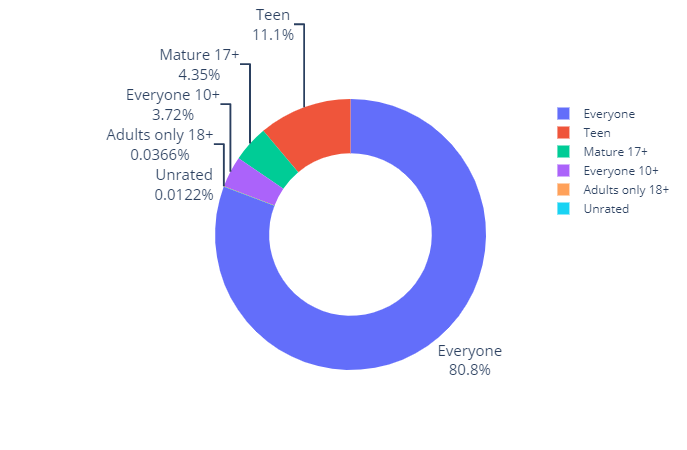

In [57]:
pie_chart = px.pie(data_frame=df_apps_clean,names=ratings.index,values=ratings.values,hole=0.6)
pie_chart.update_traces(textposition='outside',textfont_size=15,textinfo='percent+label')
pie_chart.show()

# Numeric Type Conversion: Examine the Number of Installs

**Challenge**: How many apps had over 1 billion (that's right - BILLION) installations? How many apps just had a single install? 

Check the datatype of the Installs column.

Count the number of apps at each level of installations. 

Convert the number of installations (the Installs column) to a numeric data type. Hint: this is a 2-step process. You'll have make sure you remove non-numeric characters first. 

In [68]:
df_apps_clean.Installs = df_apps_clean.Installs.str.replace(r'\D','',regex=True)

In [70]:
df_apps_clean.Installs = pd.to_numeric(df_apps_clean.Installs)

In [74]:
df_apps_clean.Installs.max()

1000000000

In [73]:
df_apps_clean.groupby('Installs').size()

Installs_Capped
1                3
5                9
10              69
50              56
100            303
500            199
1000           698
5000           425
10000          988
50000          457
100000        1096
500000         504
1000000       1417
5000000        607
10000000       933
50000000       202
100000000      189
500000000       24
1000000000      20
dtype: int64

# Find the Most Expensive Apps, Filter out the Junk, and Calculate a (ballpark) Sales Revenue Estimate

Let's examine the Price column more closely.

**Challenge**: Convert the price column to numeric data. Then investigate the top 20 most expensive apps in the dataset.

Remove all apps that cost more than $250 from the `df_apps_clean` DataFrame.

Add a column called 'Revenue_Estimate' to the DataFrame. This column should hold the price of the app times the number of installs. What are the top 10 highest grossing paid apps according to this estimate? Out of the top 10 highest grossing paid apps, how many are games?


In [78]:
df_apps_clean.Price = df_apps_clean.Price.str.replace('$','')

C:\Users\Dara\anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



In [80]:
df_apps_clean.Price = pd.to_numeric(df_apps_clean.Price)

In [81]:
df_apps_clean.nlargest(20,'Price')

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
3946,I'm Rich - Trump Edition,LIFESTYLE,3.60,275,7.30,10000,Paid,400.00,Everyone,Lifestyle
1331,most expensive app (H),FAMILY,4.30,6,1.50,100,Paid,399.99,Everyone,Entertainment
1946,I am rich (Most expensive app),FINANCE,4.10,129,2.70,1000,Paid,399.99,Teen,Finance
2394,I am Rich!,FINANCE,3.80,93,22.00,1000,Paid,399.99,Everyone,Finance
2461,I AM RICH PRO PLUS,FINANCE,4.00,36,41.00,1000,Paid,399.99,Everyone,Finance
2775,I Am Rich Pro,FAMILY,4.40,201,2.70,5000,Paid,399.99,Everyone,Entertainment
3114,I am Rich,FINANCE,4.30,180,3.80,5000,Paid,399.99,Everyone,Finance
3145,I am rich(premium),FINANCE,3.50,472,0.94,5000,Paid,399.99,Everyone,Finance
3221,I am Rich Plus,FAMILY,4.00,856,8.70,10000,Paid,399.99,Everyone,Entertainment
3554,💎 I'm rich,LIFESTYLE,3.80,718,26.00,10000,Paid,399.99,Everyone,Lifestyle


### The most expensive apps sub $250

In [82]:
df_apps_clean = df_apps_clean[df_apps_clean.Price < 250].copy()

In [83]:
df_apps_clean.nlargest(20,'Price')

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
2281,Vargo Anesthesia Mega App,MEDICAL,4.60,92,32.00,1000,Paid,79.99,Everyone,Medical
1407,LTC AS Legal,MEDICAL,4.00,6,1.30,100,Paid,39.99,Everyone,Medical
2629,I am Rich Person,LIFESTYLE,4.20,134,1.80,1000,Paid,37.99,Everyone,Lifestyle
2481,A Manual of Acupuncture,MEDICAL,3.50,214,68.00,1000,Paid,33.99,Everyone,Medical
504,AP Art History Flashcards,FAMILY,5.00,1,96.00,10,Paid,29.99,Mature 17+,Education
2207,EMT PASS,MEDICAL,3.40,51,2.40,1000,Paid,29.99,Everyone,Medical
2463,PTA Content Master,MEDICAL,4.20,64,41.00,1000,Paid,29.99,Everyone,Medical
4264,Golfshot Plus: Golf GPS,SPORTS,4.10,3387,25.00,50000,Paid,29.99,Everyone,Sports
3241,"Muscle Premium - Human Anatomy, Kinesiology, B...",MEDICAL,4.20,168,25.00,10000,Paid,24.99,Everyone,Medical
4772,Human Anatomy Atlas 2018: Complete 3D Human Body,MEDICAL,4.50,2921,25.00,100000,Paid,24.99,Everyone,Medical


### Highest Grossing Paid Apps (ballpark estimate)

In [85]:
df_apps_clean['Revenue'] =df_apps_clean.Price * df_apps_clean.Installs

In [86]:
df_apps_clean.nlargest(10,'Revenue')

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Revenue
9220,Minecraft,FAMILY,4.50,2376564,19.00,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"69,900,000.00"
8825,Hitman Sniper,GAME,4.60,408292,29.00,10000000,Paid,0.99,Mature 17+,Action,"9,900,000.00"
7151,Grand Theft Auto: San Andreas,GAME,4.40,348962,26.00,1000000,Paid,6.99,Mature 17+,Action,"6,990,000.00"
7477,Facetune - For Free,PHOTOGRAPHY,4.40,49553,48.00,1000000,Paid,5.99,Everyone,Photography,"5,990,000.00"
7977,Sleep as Android Unlock,LIFESTYLE,4.50,23966,0.85,1000000,Paid,5.99,Everyone,Lifestyle,"5,990,000.00"
6594,DraStic DS Emulator,GAME,4.60,87766,12.00,1000000,Paid,4.99,Everyone,Action,"4,990,000.00"
6082,Weather Live,WEATHER,4.50,76593,4.75,500000,Paid,5.99,Everyone,Weather,"2,995,000.00"
6746,Card Wars - Adventure Time,FAMILY,4.30,129603,23.00,1000000,Paid,2.99,Everyone 10+,Card;Action & Adventure,"2,990,000.00"
6856,Threema,COMMUNICATION,4.50,51110,3.50,1000000,Paid,2.99,Everyone,Communication,"2,990,000.00"
7044,Tasker,TOOLS,4.60,43045,3.40,1000000,Paid,2.99,Everyone,Tools,"2,990,000.00"


# Plotly Bar Charts & Scatter Plots: Analysing App Categories

In [87]:
top10_category = df_apps_clean.Category.value_counts().head(10)

In [88]:
top10_category

FAMILY             1606
GAME                910
TOOLS               719
PRODUCTIVITY        301
PERSONALIZATION     298
LIFESTYLE           297
FINANCE             296
MEDICAL             292
PHOTOGRAPHY         263
BUSINESS            262
Name: Category, dtype: int64

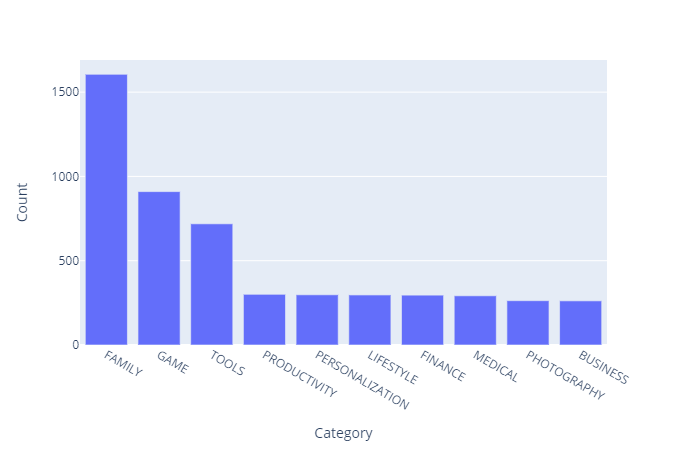

In [90]:
px.bar(x=top10_category.index,y=top10_category.values,labels={'x': 'Category','y': 'Count'})

### Vertical Bar Chart - Highest Competition (Number of Apps)

### Horizontal Bar Chart - Most Popular Categories (Highest Downloads)

In [92]:
downloads = df_apps_clean.groupby('Category',as_index=False).Installs.sum()

In [98]:
categories = downloads.sort_values(by='Installs',ascending=False).Category

In [102]:
categories.values

array(['GAME', 'COMMUNICATION', 'TOOLS', 'PRODUCTIVITY', 'SOCIAL',
       'PHOTOGRAPHY', 'FAMILY', 'VIDEO_PLAYERS', 'TRAVEL_AND_LOCAL',
       'NEWS_AND_MAGAZINES', 'ENTERTAINMENT', 'BOOKS_AND_REFERENCE',
       'PERSONALIZATION', 'SHOPPING', 'HEALTH_AND_FITNESS', 'SPORTS',
       'BUSINESS', 'LIFESTYLE', 'MAPS_AND_NAVIGATION', 'FINANCE',
       'WEATHER', 'EDUCATION', 'FOOD_AND_DRINK', 'DATING',
       'ART_AND_DESIGN', 'HOUSE_AND_HOME', 'AUTO_AND_VEHICLES',
       'LIBRARIES_AND_DEMO', 'COMICS', 'MEDICAL', 'PARENTING', 'BEAUTY',
       'EVENTS'], dtype=object)

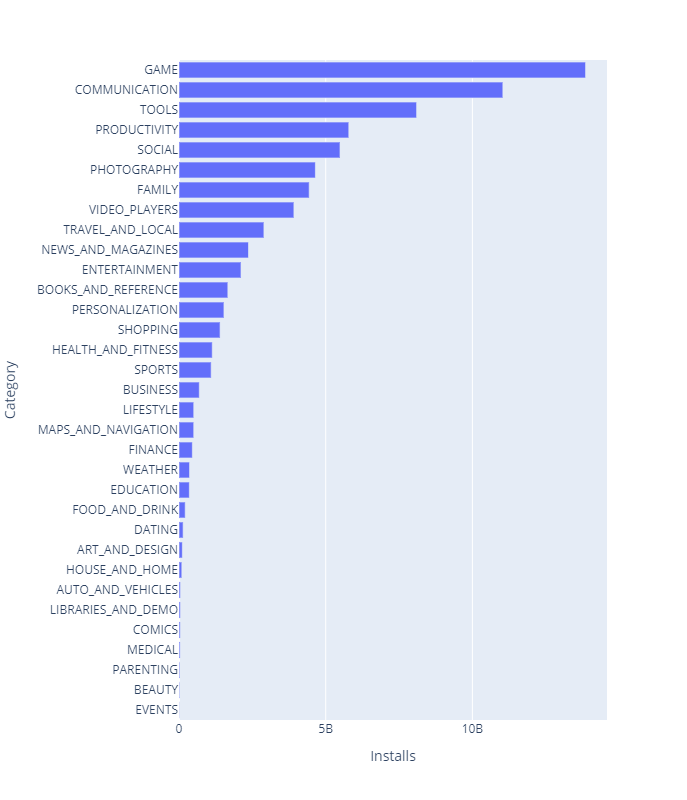

In [105]:
px.bar(data_frame=downloads,y='Category',x='Installs',category_orders={'Category': categories.values},height=800)

### Category Concentration - Downloads vs. Competition

**Challenge**: 
* First, create a DataFrame that has the number of apps in one column and the number of installs in another:

<img src=https://imgur.com/uQRSlXi.png width="350">

* Then use the [plotly express examples from the documentation](https://plotly.com/python/line-and-scatter/) alongside the [.scatter() API reference](https://plotly.com/python-api-reference/generated/plotly.express.scatter.html)to create scatter plot that looks like this. 

<img src=https://imgur.com/cHsqh6a.png>

*Hint*: Use the size, hover_name and color parameters in .scatter(). To scale the yaxis, call .update_layout() and specify that the yaxis should be on a log-scale like so: yaxis=dict(type='log') 

In [117]:
df = df_apps_clean.groupby('Category',as_index=False).agg({'App': 'count','Installs': 'sum'})

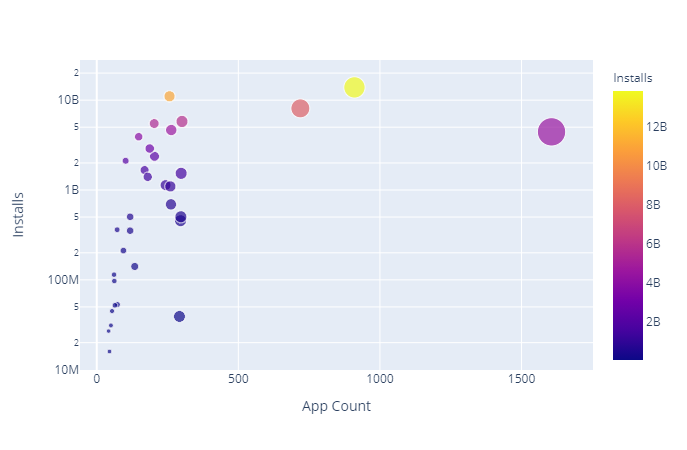

In [120]:
px.scatter(data_frame=df,x='App',y='Installs',log_y=True,size='App',color='Installs',hover_name='Category',labels={'App': 'App Count'})

# Extracting Nested Data from a Column

**Challenge**: How many different types of genres are there? Can an app belong to more than one genre? Check what happens when you use .value_counts() on a column with nested values? See if you can work around this problem by using the .split() function and the DataFrame's [.stack() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html). 


In [124]:
df_apps_clean.Genres.value_counts()

Tools                                718
Entertainment                        467
Education                            429
Productivity                         301
Personalization                      298
                                    ... 
Travel & Local;Action & Adventure      1
Card;Brain Games                       1
Lifestyle;Education                    1
Art & Design;Pretend Play              1
Music & Audio;Music & Video            1
Name: Genres, Length: 114, dtype: int64

In [132]:
stacked = df_apps_clean.Genres.str.split(';',expand=True).stack().value_counts()

In [135]:
stacked.head()

Tools            719
Education        587
Entertainment    498
Action           304
Productivity     301
dtype: int64

# Colour Scales in Plotly Charts - Competition in Genres

**Challenge**: Can you create this chart with the Series containing the genre data? 

<img src=https://imgur.com/DbcoQli.png width=400>

Try experimenting with the built in colour scales in Plotly. You can find a full list [here](https://plotly.com/python/builtin-colorscales/). 

* Find a way to set the colour scale using the color_continuous_scale parameter. 
* Find a way to make the color axis disappear by using coloraxis_showscale. 

In [141]:
top_10 = stacked.head(15)

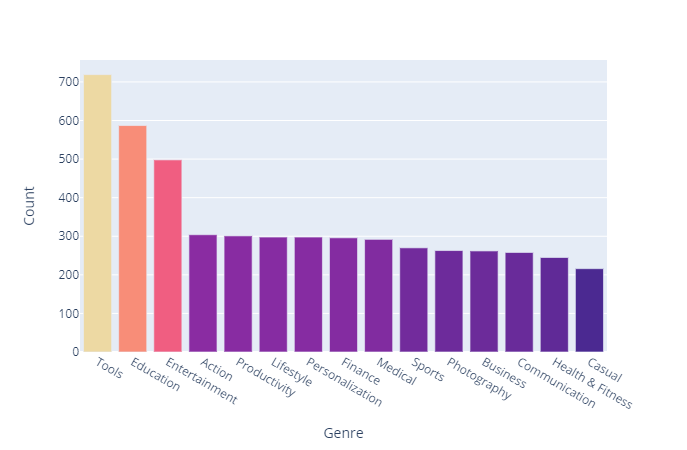

In [153]:
bar = px.bar(x=top_10.index,y=top_10.values,color=top_10.values,hover_name=top_10.index,color_continuous_scale='Agsunset',labels={'x': 'Genre','y': 'Count'})
bar.update_layout(coloraxis=dict(showscale=False))

# Grouped Bar Charts: Free vs. Paid Apps per Category

In [155]:
df_apps_clean.Type.value_counts(normalize=True)

Free   0.93
Paid   0.07
Name: Type, dtype: float64

In [162]:
x = df_apps_clean.groupby(['Category','Type'],as_index=False).size()

In [174]:
x = x.pivot(index='Category',columns='Type',values='size').fillna(0).sort_values(by=['Free','Paid'],ascending=False).stack()

In [178]:
x = x.reset_index()

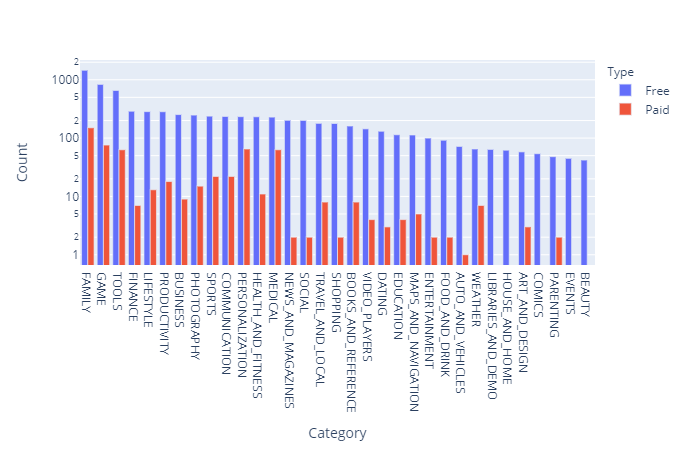

In [184]:
fig = px.bar(data_frame=x,x='Category',y=0,color='Type',barmode='group',log_y=True,labels={'0': 'Count'})
#fig.update_layout(xaxis=dict(categoryorder='total descending'))
fig.show()

**Challenge**: Use the plotly express bar [chart examples](https://plotly.com/python/bar-charts/#bar-chart-with-sorted-or-ordered-categories) and the [.bar() API reference](https://plotly.com/python-api-reference/generated/plotly.express.bar.html#plotly.express.bar) to create this bar chart: 

<img src=https://imgur.com/LE0XCxA.png>

You'll want to use the `df_free_vs_paid` DataFrame that you created above that has the total number of free and paid apps per category. 

See if you can figure out how to get the look above by changing the `categoryorder` to 'total descending' as outlined in the documentation here [here](https://plotly.com/python/categorical-axes/#automatically-sorting-categories-by-name-or-total-value). 

# Plotly Box Plots: Lost Downloads for Paid Apps

**Challenge**: Create a box plot that shows the number of Installs for free versus paid apps. How does the median number of installations compare? Is the difference large or small?

Use the [Box Plots Guide](https://plotly.com/python/box-plots/) and the [.box API reference](https://plotly.com/python-api-reference/generated/plotly.express.box.html) to create the following chart. 

<img src=https://imgur.com/uVsECT3.png>


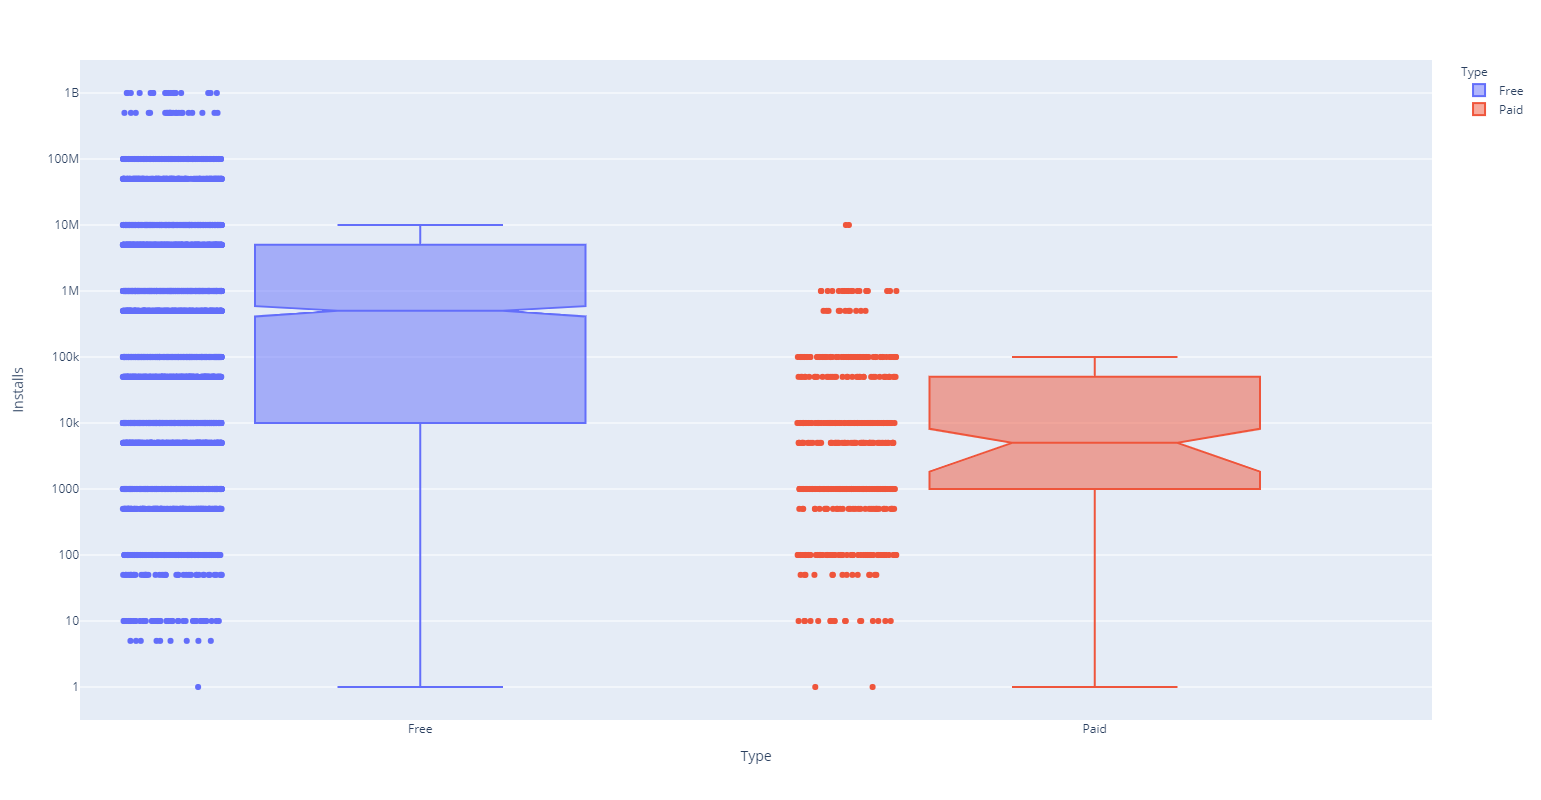

In [234]:
px.box(data_frame=df_apps_clean,x='Type',y='Installs',log_y=True,color='Type',points='all',notched=True,height=800)

# Plotly Box Plots: Revenue by App Category

**Challenge**: See if you can generate the chart below: 

<img src=https://imgur.com/v4CiNqX.png>

Looking at the hover text, how much does the median app earn in the Tools category? If developing an Android app costs $30,000 or thereabouts, does the average photography app recoup its development costs?

Hint: I've used 'min ascending' to sort the categories. 

In [202]:
paid = df_apps_clean[df_apps_clean.Type == 'Paid']

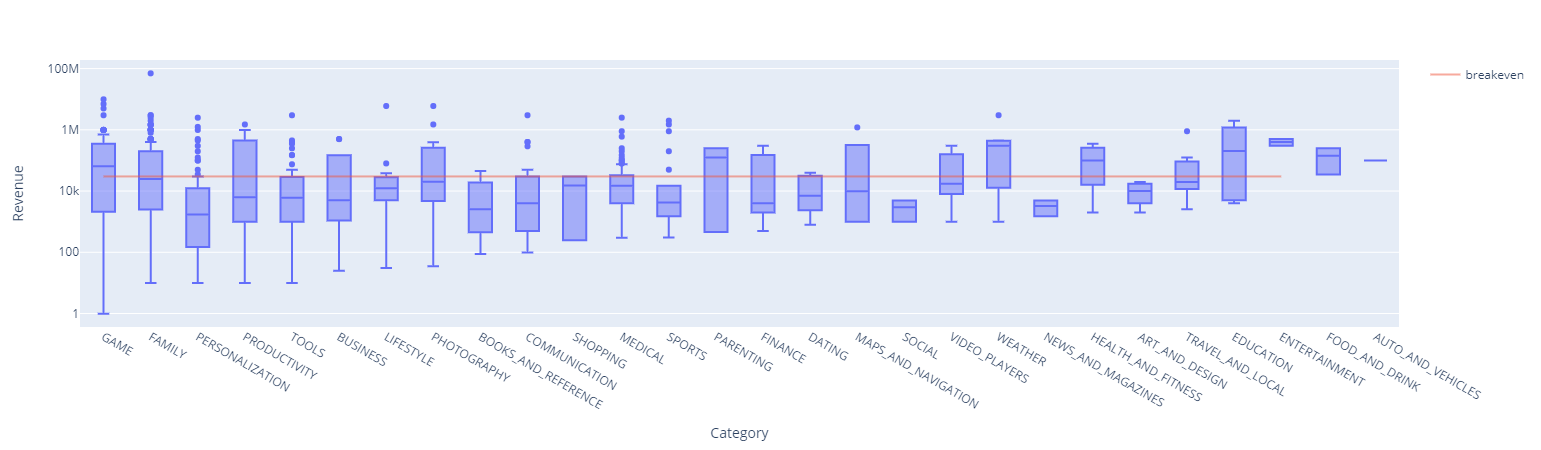

In [232]:
fig = px.box(data_frame=paid,x='Category',y='Revenue',log_y=True,width=1500)
fig.add_trace(go.Scatter(x=['GAME', 'ENTERTAINMENT'], y=[30e3, 30e3], mode="lines", name="breakeven",hoverinfo='skip',opacity=0.5))

fig.update_layout(xaxis=dict(categoryorder='min ascending'))
fig.show()

# How Much Can You Charge? Examine Paid App Pricing Strategies by Category

**Challenge**: What is the median price price for a paid app? Then compare pricing by category by creating another box plot. But this time examine the prices (instead of the revenue estimates) of the paid apps. I recommend using `{categoryorder':'max descending'}` to sort the categories.

In [212]:
import plotly.graph_objs as go

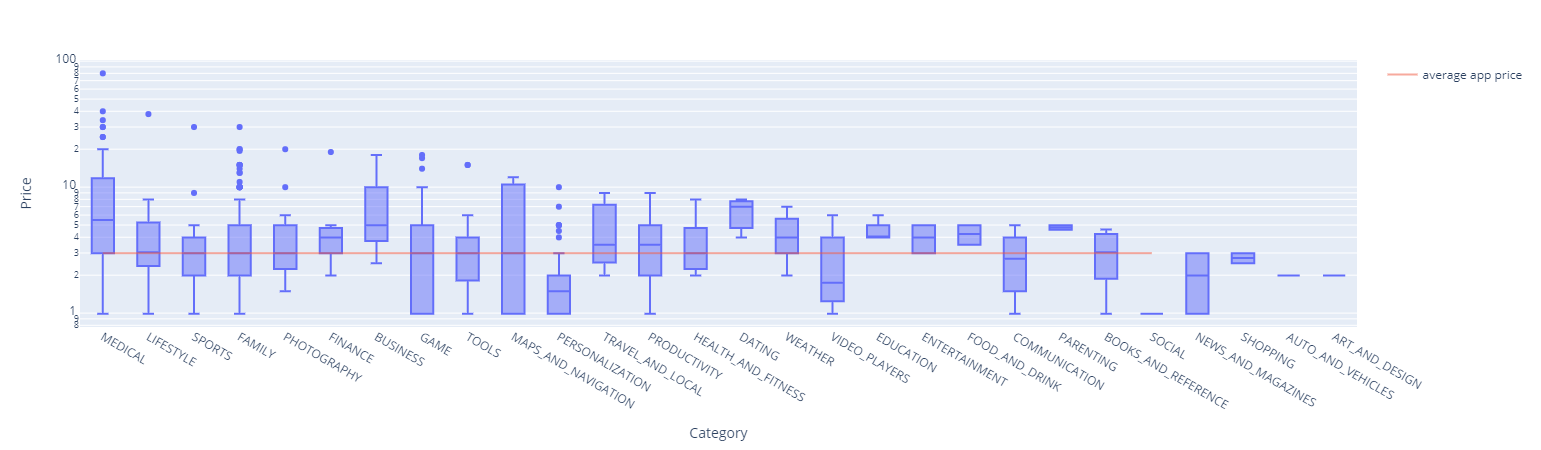

In [227]:
fig = px.box(data_frame=paid,x='Category',y='Price',log_y=True,width=1500)
fig.add_trace(go.Scatter(x=['MEDICAL', 'SOCIAL'], y=[2.99, 2.99], mode="lines", name="average app price",opacity=0.5))
fig.update_layout(xaxis=dict(categoryorder='max descending'))

fig.show()